# Load NWB file content

In [2]:
# general python modules for scientific analysis
import os
import numpy as np
import matplotlib.pylab as plt
#plt.style.use('seaborn')

# load the NWB python API
import pynwb

### Download the dataset:

Get the `SST-ffGratingStim-2P` folder from the bucket in the repository https://wiki.ebrains.eu/bin/view/Collabs/nwb-data-sharing-pipeline/Bucket

In [22]:
datafolder = os.path.join(os.path.expanduser('~'), 'CURATED', 'SST-ffGratingStim-2P') # update

In [23]:
filename = os.path.join(datafolder, 'Wild-Type', 'sub-01', 'sub-01_ses-02_V1-ffGratingStim-2Prec.nwb')
io = pynwb.NWBHDF5IO(filename, 'r')
nwbfile = io.read()

## File content: metadata, raw signals and preprocessed quantities

In the printed version below, one see a (messy) overview of the file content

In [6]:
print(nwbfile)

root pynwb.file.NWBFile at 0x6077424080
Fields:
  acquisition: {
    CaImaging-TimeSeries <class 'pynwb.ophys.TwoPhotonSeries'>,
    Photodiode-Signal <class 'pynwb.base.TimeSeries'>,
    Running-Speed <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    Microscope <class 'pynwb.device.Device'>
  }
  experiment_description: ff-gratings-8orientation-2contrasts-15repeats
  experimenter: ['Dhanasak Dhanasobhon']
  file_create_date: [datetime.datetime(2024, 6, 20, 11, 2, 18, 183238, tzinfo=tzoffset(None, 7200))]
  identifier: 2023_03_31-12-55-47
  imaging_planes: {
    my_imgpln <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Institut du Cerveau et de la Moelle, Paris
  lab: Rebola and Bacci labs
  processing: {
    FaceMotion <class 'pynwb.base.ProcessingModule'>,
    Pupil <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: {'config': 'Taddy-Ophys-A1', 'root-data-folder': 'C:\\Users\\yann.zerlaut\\DATA', 'Screen': 'Dell-

## Session Description

I used the session description to store all metadata:
- subject info that could not be put in the NWB defaults
- some infos on my recording setup configuration (acq settings, calibration values, trigger details, ...)
- the visual stimulation parameters

In [7]:
print(nwbfile.session_description)

{'config': 'Taddy-Ophys-A1', 'root-data-folder': 'C:\\Users\\yann.zerlaut\\DATA', 'Screen': 'Dell-2020', 'protocol': 'ff-gratings-8orientation-2contrasts-15repeats', 'VisualStim': True, 'intervention': '', 'notes': '', 'FOV': 'FOV2', 'subject_ID': 'MAAD1_SSTcreXtdTomato', 'subject_props': {'Subject-ID': 'MAAD1_SSTcreXtdTomato', 'Anibio-Number': 'nan', 'Date-of-Birth': '05/01/2023', 'Tatoo': 'nan', 'Sex': 'Male', 'Strain': 'C57B6/J', 'Genotype': 'SSTcre', 'Surgery': 'headplate+injection', 'Surgery-Date': '23/02/2023', 'Virus': 'VR27', 'headplate-angle-from-rig-axis': '10', 'FOV1': '(540, 43, 281)', 'FOV2': '(542, 121, 145)', 'FOV3': 'nan'}, 'NIdaq-acquisition-frequency': 10000, 'NIdaq-analog-input-channels': 1, 'NIdaq-digital-input-channels': 2, 'Rig': 'ICM-A1-2P-setup', 'Z-sign-correction-for-rig': -1, 'FaceCamera-frame-rate': 30, 'FaceCamera-1cm-in-pix': 480, 'Height-of-Microscope-Camera-Image-in-mm': 2.7, 'STEP_FOR_CA_IMAGING_TRIGGER': {'channel': 0, 'onset': 0.1, 'duration': 0.3, 'v

## Subject information

In [8]:
# just the "subject" information
nwbfile.subject

subject pynwb.file.Subject at 0x6077641872
Fields:
  age__reference: birth
  date_of_birth: 2023-01-05 00:00:00+01:00
  description: Unknown
  genotype: SST-IRES-Cre
  sex: Unknown
  species: Mus Musculus
  subject_id: sub-01
  weight: Unknown

## Some general information stored in regular entries of NWB files

In [10]:
nwbfile.experimenter

('Dhanasak Dhanasobhon',)

In [11]:
nwbfile.experiment_description

'ff-gratings-8orientation-2contrasts-15repeats'

In [12]:
nwbfile.file_create_date

[datetime.datetime(2024, 6, 20, 11, 2, 18, 183238, tzinfo=tzoffset(None, 7200))]

In [13]:
nwbfile.institution

'Institut du Cerveau et de la Moelle, Paris'

In [14]:
nwbfile.lab

'Rebola and Bacci labs'

## Acquisition data

In [15]:
nwbfile.acquisition

{'CaImaging-TimeSeries': CaImaging-TimeSeries pynwb.ophys.TwoPhotonSeries at 0x6077454160
 Fields:
   comments: raw-data-folder=**home**yann.zerlaut**ASSEMBLE**TSeries-03312023-1206-002
   conversion: 1.0
   data: <HDF5 dataset "data": shape (1, 512, 512), type "<f4">
   description: no description
   dimension: <HDF5 dataset "dimension": shape (1,), type "<i8">
   imaging_plane: my_imgpln pynwb.ophys.ImagingPlane at 0x6077449168
 Fields:
   conversion: 1.0
   description: Depth=-169.2[um]
   device: Microscope pynwb.device.Device at 0x6077486416
 Fields:
   description: 2P@ICM
   manufacturer: Bruker
 
   excitation_lambda: 940.0
   imaging_rate: 29.843829627067922
   indicator: GCamp
   location: V1
   optical_channel: (
     OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
   )
   unit: meters
 
   interval: 1
   offset: 0.0
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (1,), type "<f8">
   timestamps_unit: seconds
   unit: s,
 'Photodiode-Signal': Photodio

Text(0.5, 0, 'sample # (acq. @ 50.0Hz)')

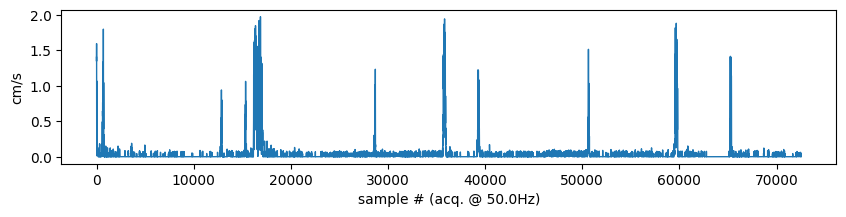

In [16]:
# raw facecamera data
fig, AX = plt.subplots(1, figsize=(10,2))
plt.plot(nwbfile.acquisition['Running-Speed'].data[:], lw=1)
plt.ylabel('cm/s')
plt.xlabel('sample # (acq. @ %.1fHz)' % nwbfile.acquisition['Running-Speed'].rate)

## Processed data

In [17]:
nwbfile.processing

{'FaceMotion': FaceMotion pynwb.base.ProcessingModule at 0x6077435984
 Fields:
   data_interfaces: {
     face-motion <class 'pynwb.base.TimeSeries'>,
     grooming <class 'pynwb.base.TimeSeries'>
   }
   description: face motion dynamics,
  facemotion ROI: (x0,dx,y0,dy)=(301,693,351,390)
 ,
 'Pupil': Pupil pynwb.base.ProcessingModule at 0x6077438928
 Fields:
   data_interfaces: {
     angle <class 'pynwb.base.TimeSeries'>,
     blinking <class 'pynwb.base.TimeSeries'>,
     cx <class 'pynwb.base.TimeSeries'>,
     cy <class 'pynwb.base.TimeSeries'>,
     sx <class 'pynwb.base.TimeSeries'>,
     sy <class 'pynwb.base.TimeSeries'>
   }
   description: processed quantities of Pupil dynamics,
  pupil ROI: (xmin,xmax,ymin,ymax)=(177,325,446,575)
  pix_to_mm=0.021,
 'ophys': ophys pynwb.base.ProcessingModule at 0x6078281296
 Fields:
   data_interfaces: {
     Backgrounds_0 <class 'pynwb.base.Images'>,
     Fluorescence <class 'pynwb.ophys.Fluorescence'>,
     ImageSegmentation <class 'pynwb

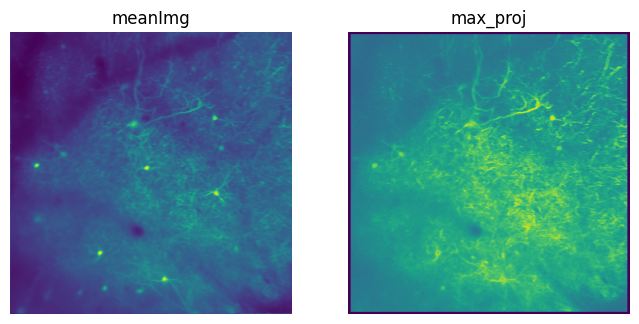

In [18]:
# Calcium Imaging
fig, AX = plt.subplots(1, 2, figsize=(8,5))
for key, ax in zip(['meanImg', 'max_proj'], AX):
    ax.imshow(np.array(nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'][key])**.2, 
              cmap=plt.cm.viridis)
    ax.set_title(key)
    ax.axis('off')

In [19]:
nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['Fluorescence'].timestamps[:]

array([1.26753882e-01, 1.60741124e-01, 1.94728366e-01, ...,
       1.45175585e+03, 1.45178983e+03, 1.45182382e+03])

Text(0.5, 0, 'time (s)')

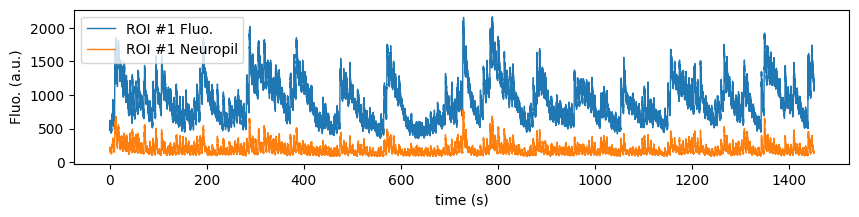

In [20]:
# calcium traces
roi = 0
fig, AX = plt.subplots(1, figsize=(10,2))
plt.plot(nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['Fluorescence'].timestamps[:],
         nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['Fluorescence'].data[:,roi], 
         lw=1, label='ROI #%i Fluo.' % (roi+1))
plt.plot(nwbfile.processing['ophys'].data_interfaces['Neuropil'].roi_response_series['Neuropil'].timestamps[:],
         nwbfile.processing['ophys'].data_interfaces['Neuropil'].roi_response_series['Neuropil'].data[:,roi],
         lw=1, label='ROI #%i Neuropil' % (roi+1))
plt.legend()
plt.ylabel('Fluo. (a.u.)')
plt.xlabel('time (s)')

In [21]:
nwbfile.processing['ophys'].data_interfaces

{'Backgrounds_0': Backgrounds_0 pynwb.base.Images at 0x6078214096
 Fields:
   description: no description
   images: {
     Vcorr <class 'pynwb.image.GrayscaleImage'>,
     max_proj <class 'pynwb.image.GrayscaleImage'>,
     meanImg <class 'pynwb.image.GrayscaleImage'>,
     meanImgE <class 'pynwb.image.GrayscaleImage'>,
     meanImg_chan2 <class 'pynwb.image.GrayscaleImage'>
   },
 'Fluorescence': Fluorescence pynwb.ophys.Fluorescence at 0x6078147344
 Fields:
   roi_response_series: {
     Fluorescence <class 'pynwb.ophys.RoiResponseSeries'>
   },
 'ImageSegmentation': ImageSegmentation pynwb.ophys.ImageSegmentation at 0x6078210768
 Fields:
   plane_segmentations: {
     PlaneSegmentation <class 'pynwb.ophys.PlaneSegmentation'>
   },
 'Neuropil': Neuropil pynwb.ophys.Fluorescence at 0x6078147408
 Fields:
   roi_response_series: {
     Neuropil <class 'pynwb.ophys.RoiResponseSeries'>
   }}